<a href="https://colab.research.google.com/github/Pebeirao/TensorFlow-Basic-Tutorial/blob/master/Under_and_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


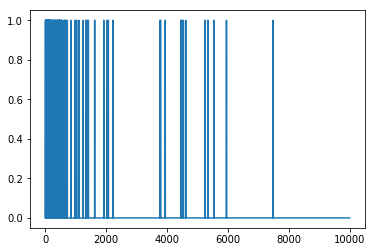

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

W0711 11:21:46.192286 139747796440960 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0711 11:21:46.308558 139747796440960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5103 - acc: 0.8011 - binary_crossentropy: 0.5103 - val_loss: 0.3418 - val_acc: 0.8758 - val_binary_crossentropy: 0.3418
Epoch 2/20
25000/25000 - 4s - loss: 0.2517 - acc: 0.9104 - binary_crossentropy: 0.2517 - val_loss: 0.2827 - val_acc: 0.8882 - val_binary_crossentropy: 0.2827
Epoch 3/20
25000/25000 - 4s - loss: 0.1783 - acc: 0.9376 - binary_crossentropy: 0.1783 - val_loss: 0.2951 - val_acc: 0.8822 - val_binary_crossentropy: 0.2951
Epoch 4/20
25000/25000 - 4s - loss: 0.1436 - acc: 0.9503 - binary_crossentropy: 0.1436 - val_loss: 0.3358 - val_acc: 0.8706 - val_binary_crossentropy: 0.3358
Epoch 5/20
25000/25000 - 4s - loss: 0.1168 - acc: 0.9609 - binary_crossentropy: 0.1168 - val_loss: 0.3450 - val_acc: 0.8735 - val_binary_crossentropy: 0.3450
Epoch 6/20
25000/25000 - 4s - loss: 0.0944 - acc: 0.9705 - binary_crossentropy: 0.0944 - val_loss: 0.3779 - val_acc: 0.8700 - val_binary_crossentropy: 0.3779
Ep

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5969 - acc: 0.6744 - binary_crossentropy: 0.5969 - val_loss: 0.5384 - val_acc: 0.7683 - val_binary_crossentropy: 0.5384
Epoch 2/20
25000/25000 - 4s - loss: 0.4864 - acc: 0.8461 - binary_crossentropy: 0.4864 - val_loss: 0.4913 - val_acc: 0.8490 - val_binary_crossentropy: 0.4913
Epoch 3/20
25000/25000 - 4s - loss: 0.4385 - acc: 0.8938 - binary_crossentropy: 0.4385 - val_loss: 0.4686 - val_acc: 0.8694 - val_binary_crossentropy: 0.4686
Epoch 4/20
25000/25000 - 4s - loss: 0.4056 - acc: 0.9169 - binary_crossentropy: 0.4056 - val_loss: 0.4579 - val_acc: 0.8660 - val_binary_crossentropy: 0.4579
Epoch 5/20
25000/25000 - 4s - loss: 0.3780 - acc: 0.9332 - binary_crossentropy: 0.3780 - val_loss: 0.4452 - val_acc: 0.8779 - val_binary_crossentropy: 0.4452
Epoch 6/20
25000/25000 - 4s - loss: 0.3548 - acc: 0.9461 - binary_crossentropy: 0.3548 - val_loss: 0.4471 - val_acc: 0.8733 - val_binary_crossentropy: 0.4471
Ep

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 17s - loss: 0.3527 - acc: 0.8472 - binary_crossentropy: 0.3527 - val_loss: 0.2924 - val_acc: 0.8790 - val_binary_crossentropy: 0.2924
Epoch 2/20
25000/25000 - 17s - loss: 0.1400 - acc: 0.9492 - binary_crossentropy: 0.1400 - val_loss: 0.3274 - val_acc: 0.8750 - val_binary_crossentropy: 0.3274
Epoch 3/20
25000/25000 - 17s - loss: 0.0423 - acc: 0.9886 - binary_crossentropy: 0.0423 - val_loss: 0.4352 - val_acc: 0.8728 - val_binary_crossentropy: 0.4352
Epoch 4/20
25000/25000 - 17s - loss: 0.0064 - acc: 0.9989 - binary_crossentropy: 0.0064 - val_loss: 0.5636 - val_acc: 0.8700 - val_binary_crossentropy: 0.5636
Epoch 5/20
25000/25000 - 17s - loss: 7.7228e-04 - acc: 1.0000 - binary_crossentropy: 7.7228e-04 - val_loss: 0.6775 - val_acc: 0.8684 - val_binary_crossentropy: 0.6775
Epoch 6/20
25000/25000 - 17s - loss: 1.9790e-04 - acc: 1.0000 - binary_crossentropy: 1.9790e-04 - val_loss: 0.7296 - val_acc: 0.8688 - val_binary_c

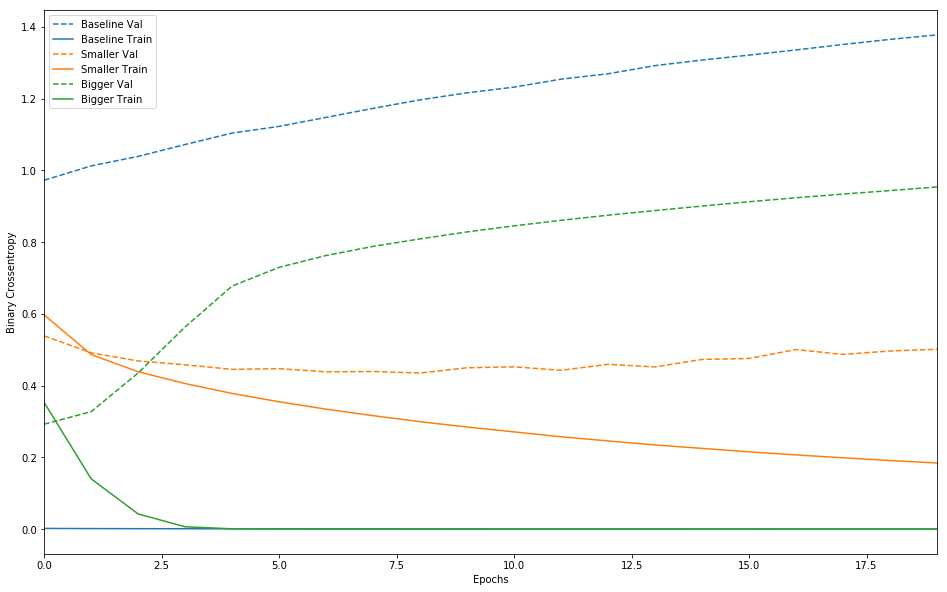

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5659 - acc: 0.7690 - binary_crossentropy: 0.5278 - val_loss: 0.4135 - val_acc: 0.8727 - val_binary_crossentropy: 0.3751
Epoch 2/20
25000/25000 - 4s - loss: 0.3243 - acc: 0.9026 - binary_crossentropy: 0.2808 - val_loss: 0.3402 - val_acc: 0.8861 - val_binary_crossentropy: 0.2925
Epoch 3/20
25000/25000 - 4s - loss: 0.2639 - acc: 0.9268 - binary_crossentropy: 0.2131 - val_loss: 0.3390 - val_acc: 0.8852 - val_binary_crossentropy: 0.2861
Epoch 4/20
25000/25000 - 4s - loss: 0.2384 - acc: 0.9355 - binary_crossentropy: 0.1835 - val_loss: 0.3441 - val_acc: 0.8837 - val_binary_crossentropy: 0.2881
Epoch 5/20
25000/25000 - 4s - loss: 0.2202 - acc: 0.9452 - binary_crossentropy: 0.1631 - val_loss: 0.3555 - val_acc: 0.8814 - val_binary_crossentropy: 0.2977
Epoch 6/20
25000/25000 - 4s - loss: 0.2088 - acc: 0.9502 - binary_crossentropy: 0.1500 - val_loss: 0.3740 - val_acc: 0.8760 - val_binary_crossentropy: 0.3147
Ep

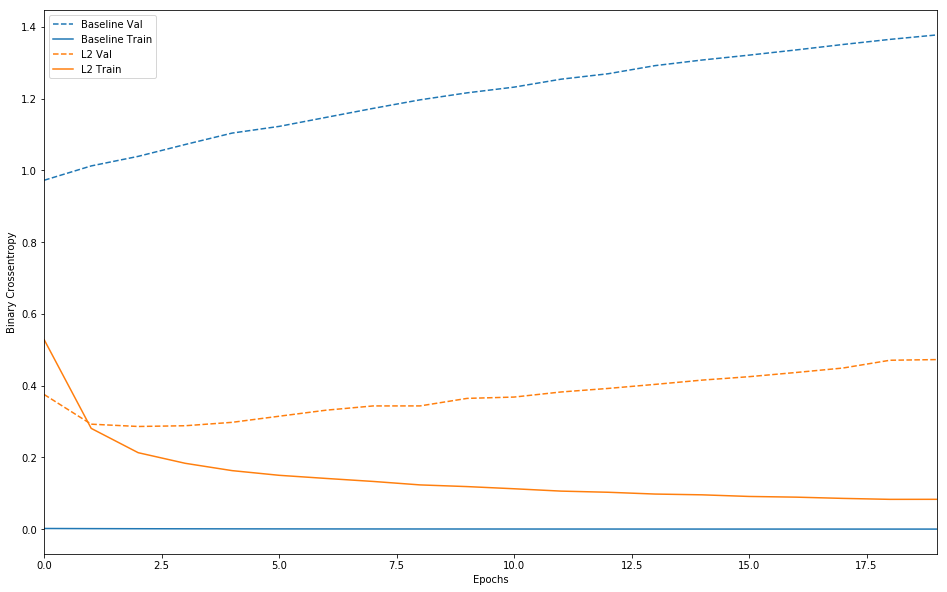

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6299 - acc: 0.6344 - binary_crossentropy: 0.6299 - val_loss: 0.4854 - val_acc: 0.8506 - val_binary_crossentropy: 0.4854
Epoch 2/20
25000/25000 - 4s - loss: 0.4601 - acc: 0.8054 - binary_crossentropy: 0.4601 - val_loss: 0.3440 - val_acc: 0.8802 - val_binary_crossentropy: 0.3440
Epoch 3/20
25000/25000 - 4s - loss: 0.3572 - acc: 0.8666 - binary_crossentropy: 0.3572 - val_loss: 0.2919 - val_acc: 0.8871 - val_binary_crossentropy: 0.2919
Epoch 4/20
25000/25000 - 4s - loss: 0.2924 - acc: 0.8974 - binary_crossentropy: 0.2924 - val_loss: 0.2777 - val_acc: 0.8879 - val_binary_crossentropy: 0.2777
Epoch 5/20
25000/25000 - 4s - loss: 0.2512 - acc: 0.9149 - binary_crossentropy: 0.2512 - val_loss: 0.2804 - val_acc: 0.8866 - val_binary_crossentropy: 0.2804
Epoch 6/20
25000/25000 - 4s - loss: 0.2211 - acc: 0.9270 - binary_crossentropy: 0.2211 - val_loss: 0.2883 - val_acc: 0.8857 - val_binary_crossentropy: 0.2883
Ep

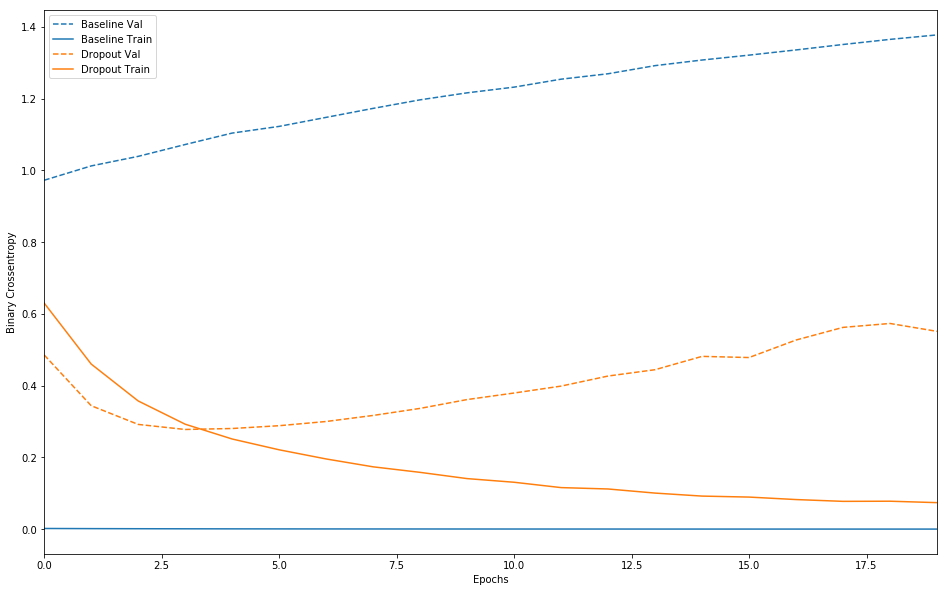

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])